In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r"C:\Users\ADMIN\Documents\AI\SVM\Clustered_Customer_Data.csv")

In [29]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


# DATA VISUALIZE

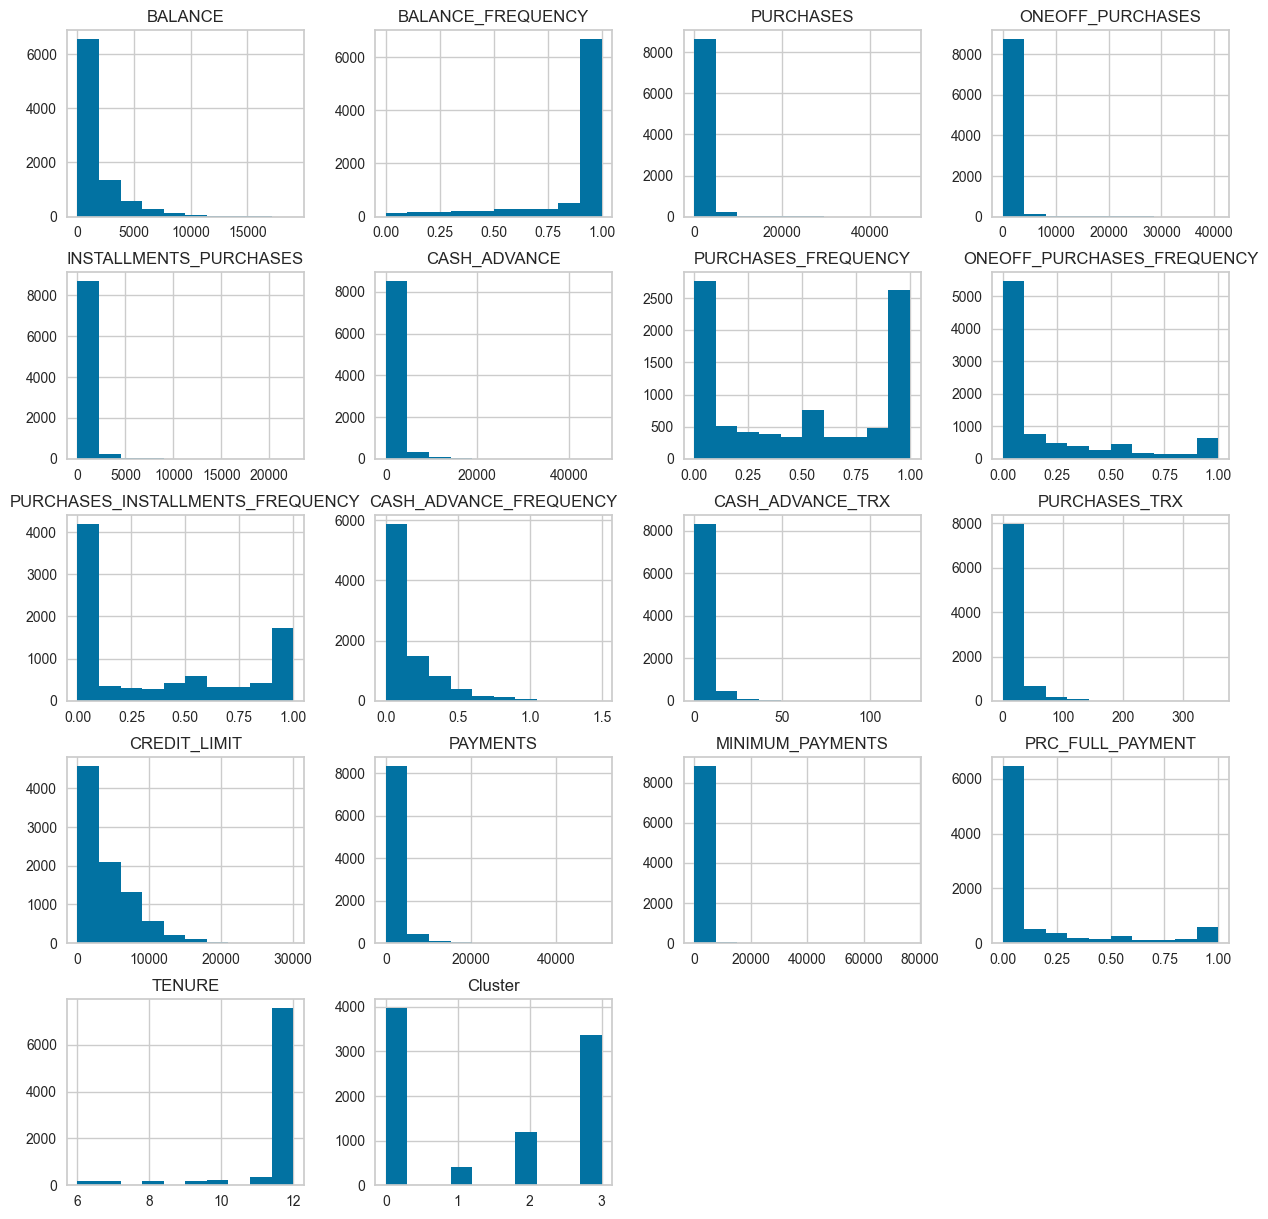

In [32]:
df = df.drop(df.columns[0], axis = 1)
df.hist(figsize=(15,15))
plt.show()

<AxesSubplot: >

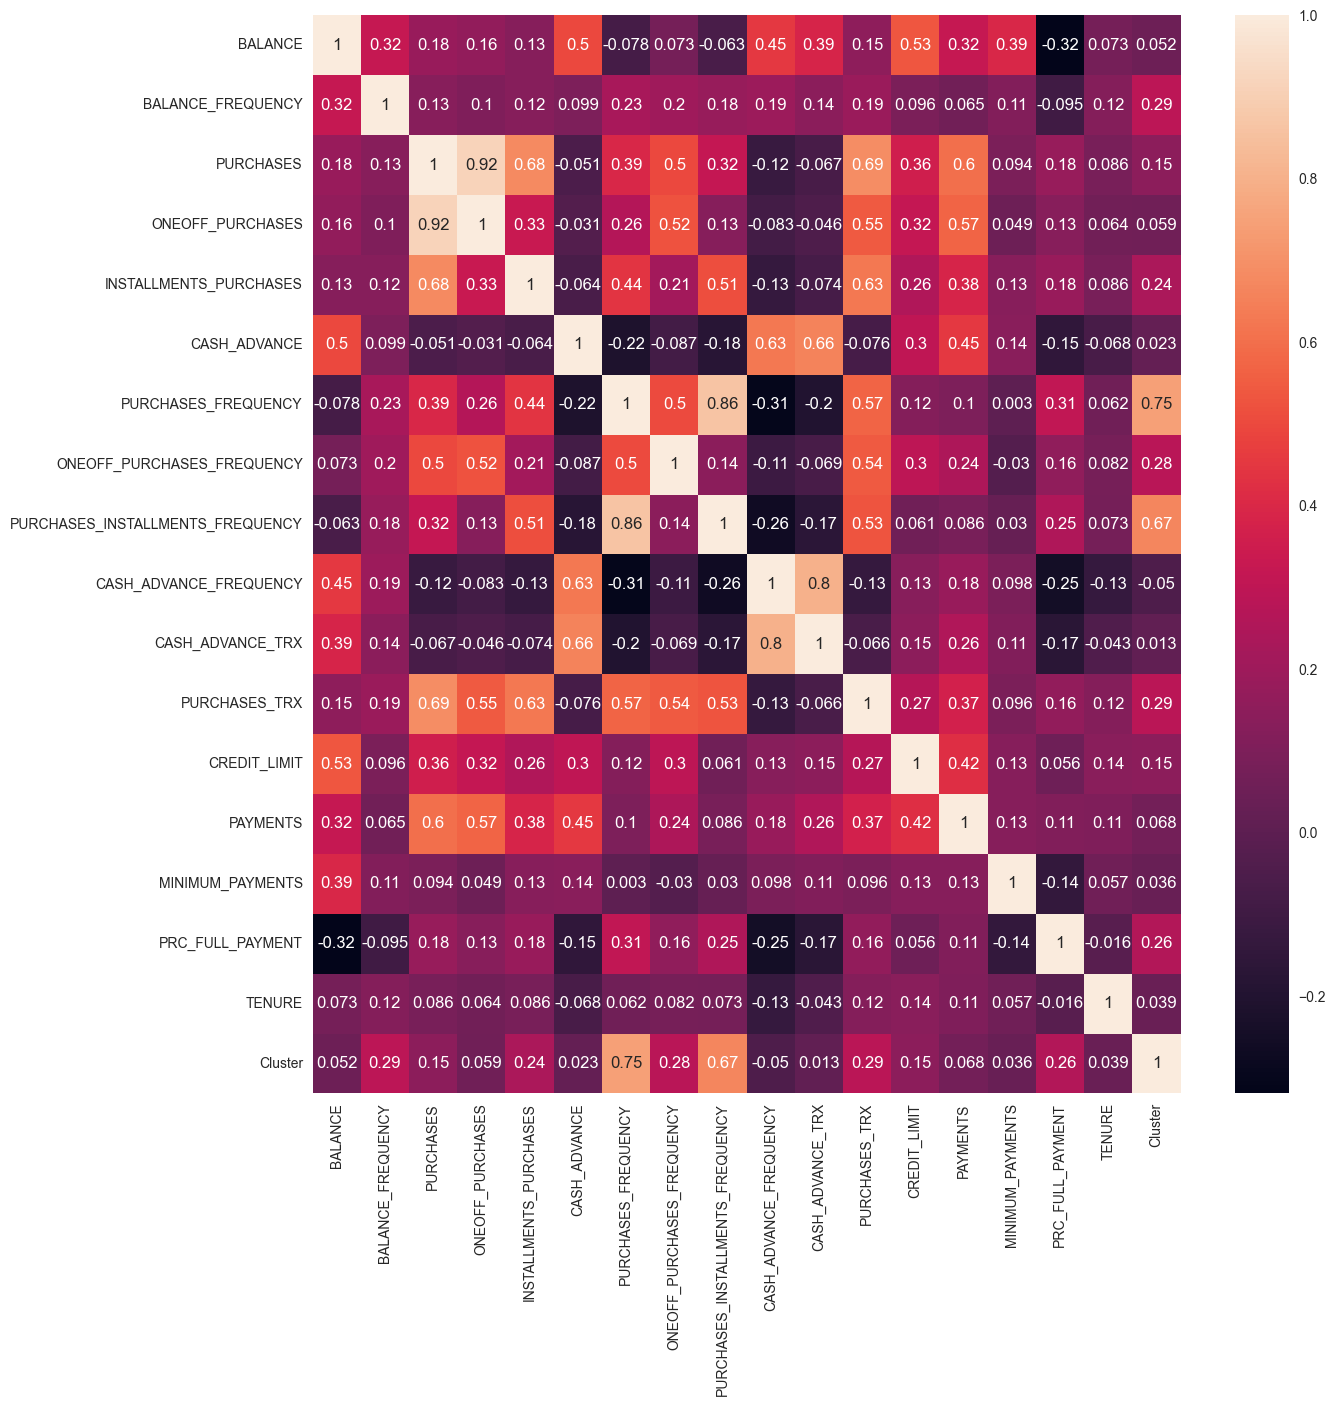

In [33]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True)

In [34]:
def drop_with_high_corr(table, threshold):
    # lấy gtri tuyet đối 
    corr_matrix = table.corr().abs()
    # tính trung bình hệ số tương quan cho mỗi trường dữ liệu với các trường dữ liệu còn lại
    avg_corr_matrix = corr_matrix.mean(axis = 1)
    # Tạo ma trận tam giác trên từ corr_matrix
    up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # List các cột xóa
    drop_columns = list()
    for row in range(len(up)-1):
        col_idx = row + 1
        # row != col 
        for col in range (col_idx, len(up) - 1):
            if(corr_matrix.iloc[row, col] > threshold):
                # Chọn đặc trưng nào có trung bình hệ số tương quan lớn hơn
                if(avg_corr_matrix.iloc[row] > avg_corr_matrix.iloc[col]): 
                    drop_columns.append(row)
                else: 
                    drop_columns.append(col)
    
    # Dùng set để khiến mỗi phân tử bên trong mảng drop là duy nhất
    drop_set = list(set(drop_columns))
    dropcols_names = list(table.columns[[item for item in drop_set]])
    
    return dropcols_names



drop_columns = drop_with_high_corr(df, 0.9)
print(drop_columns)
df = df.drop(drop_columns, axis=1)

['PURCHASES']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7284\3951310066.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot: >

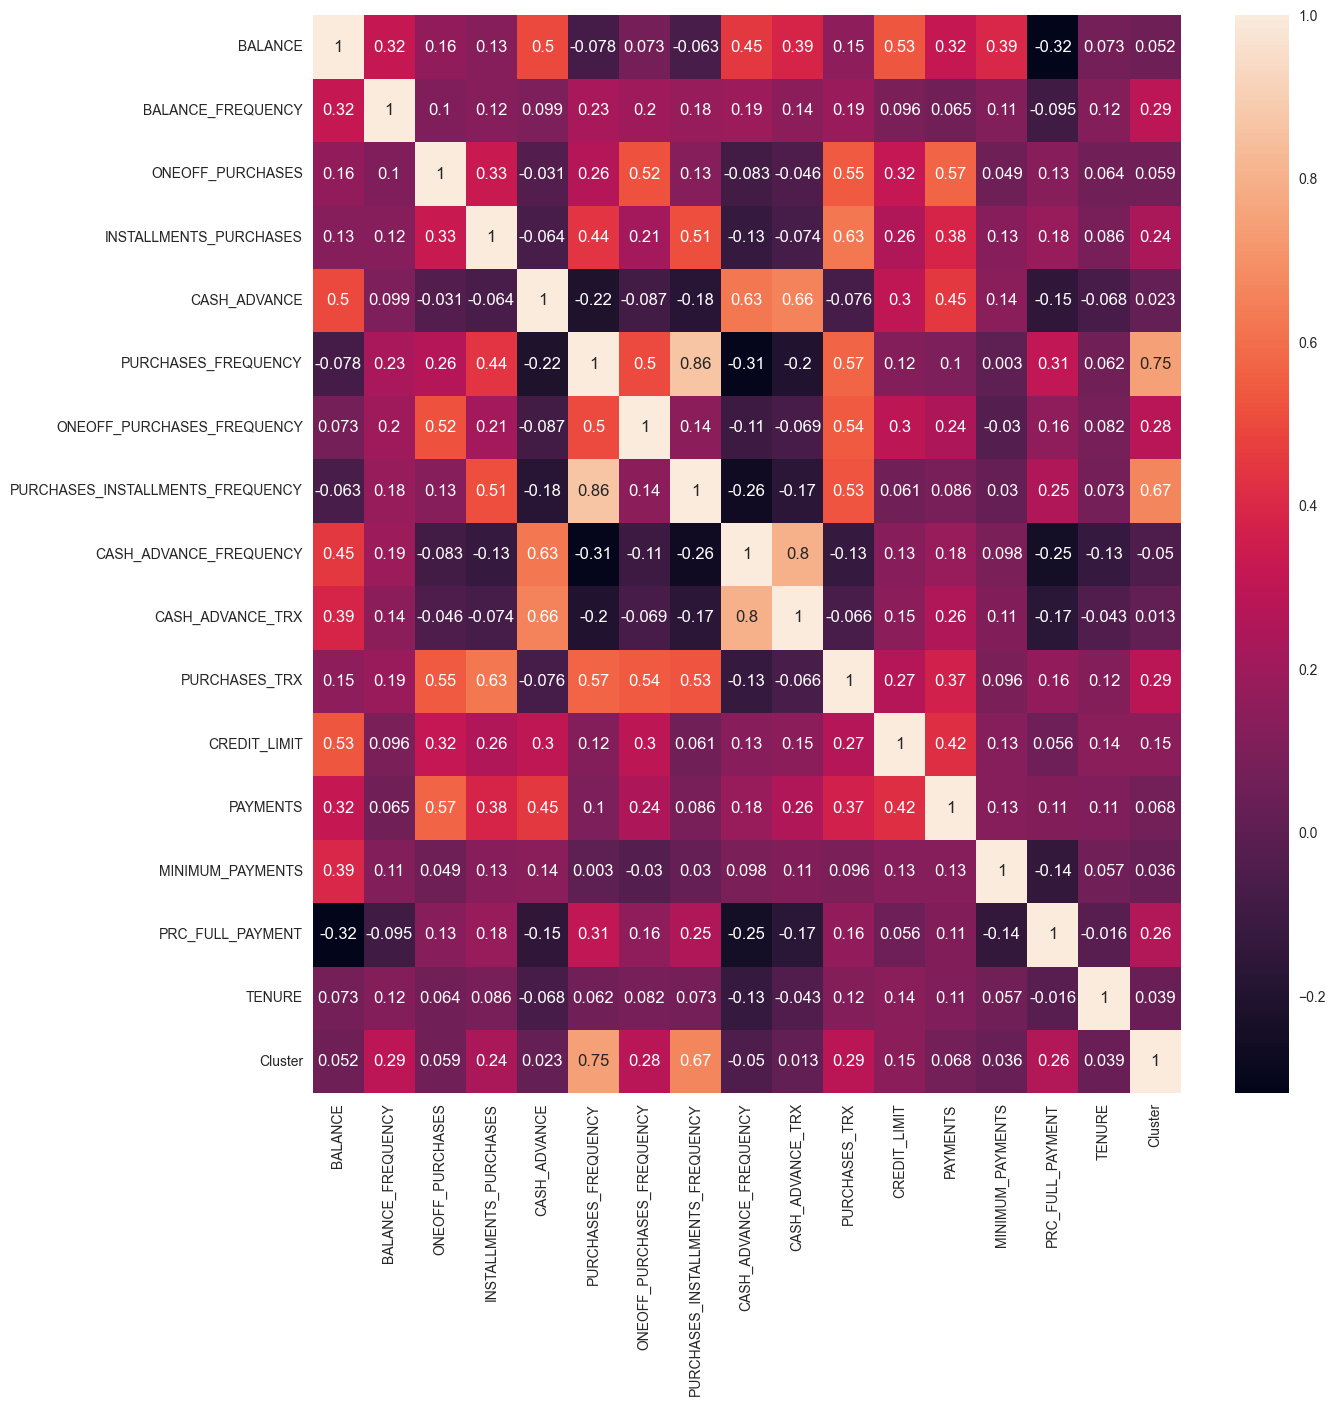

In [35]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df = scaler.fit_transform(df.values)

In [37]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(scaler_df)

#để xuất ra label của tập training (scaled_data) ta dùng .labels_
y = kmeans_model.labels_
print(y)

[3 2 1 ... 1 3 3]


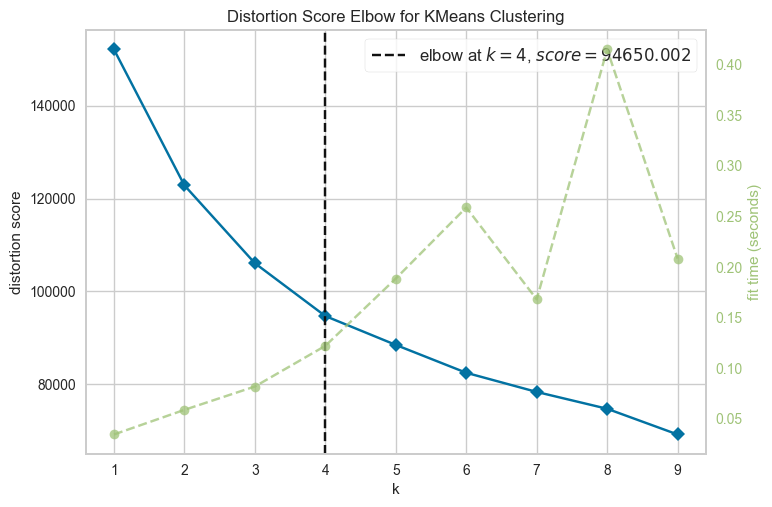

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k = (1, 10))
elbow_method.fit(scaler_df)
elbow_method.show()

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaler_df, y, test_size= 0.2)

In [42]:
kmeans_model.cluster_centers_

array([[ 9.81417339e-01,  4.64381379e-01,  2.58678348e+00,
         2.33767110e+00, -1.42954614e-01,  1.14128565e+00,
         1.78432573e+00,  1.08442536e+00, -2.99787742e-01,
        -1.70701263e-01,  2.99591824e+00,  1.43100990e+00,
         1.85253328e+00,  4.94216444e-01,  4.17415807e-01,
         3.24101304e-01, -2.48769500e-01],
       [-3.29763488e-01,  2.41207795e-01, -1.30993676e-03,
         2.52490663e-01, -3.68200381e-01,  9.82904421e-01,
         3.10713663e-01,  8.72619954e-01, -4.64315259e-01,
        -3.61081346e-01,  2.85052145e-01, -8.39916499e-02,
        -1.42639260e-01, -9.67923832e-02,  3.98798345e-01,
         5.63388524e-02,  1.13357634e+00],
       [ 1.45431678e+00,  3.84418344e-01, -1.61440869e-01,
        -2.56160893e-01,  1.69144536e+00, -5.09824112e-01,
        -2.16445115e-01, -4.57627251e-01,  1.74714786e+00,
         1.62129447e+00, -2.93882160e-01,  8.33825148e-01,
         6.06321668e-01,  4.90212009e-01, -4.05750173e-01,
        -9.82953763e-02,  4.0

# PCA

In [67]:
print(type(scaler_df))
print(type(df))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(df.columns)) #khai báo 
pca.fit(X_train)

PCA(n_components=17)

In [72]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(X_train), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

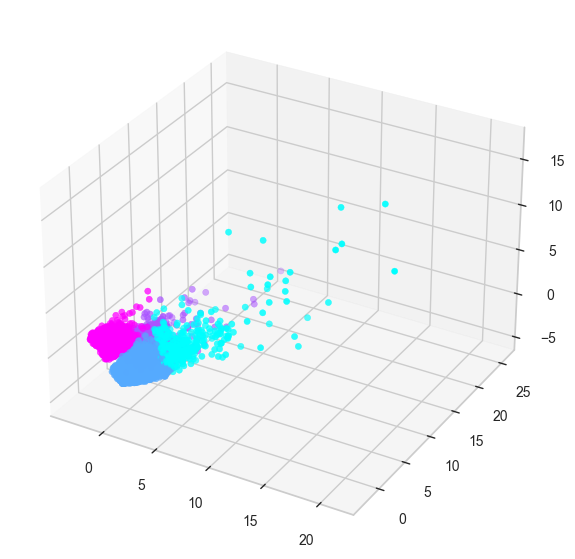

In [73]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=y_train, cmap="cool")
plt.show()

In [74]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca_df = pd.DataFrame(pca.transform(X_train), columns=["pca1", "pca2"])

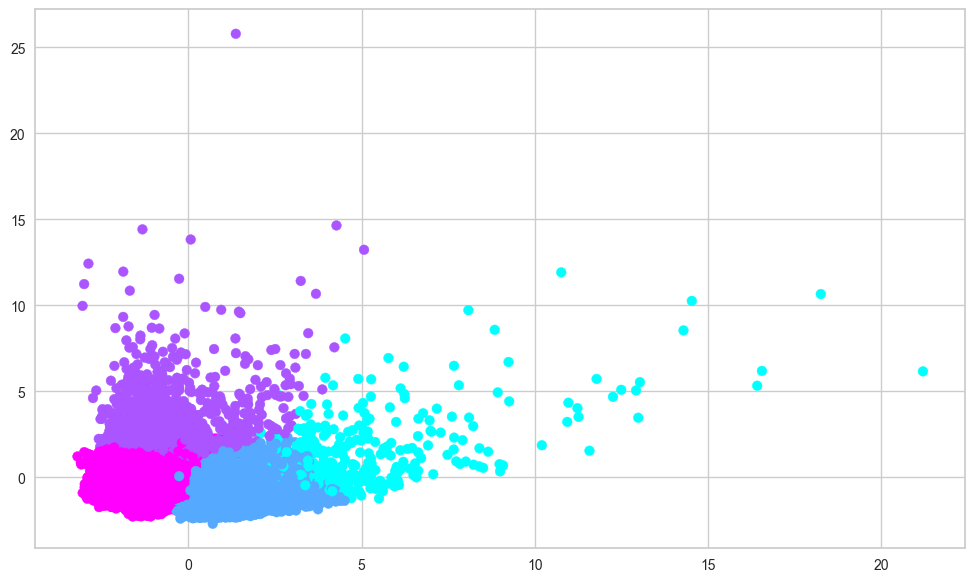

In [79]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=y_train, cmap="cool")
plt.show()

# Legend


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7284\2915758621.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_df.iloc[index].pca1, pca_df.iloc[index].pca2, label=g, cmap="cool")


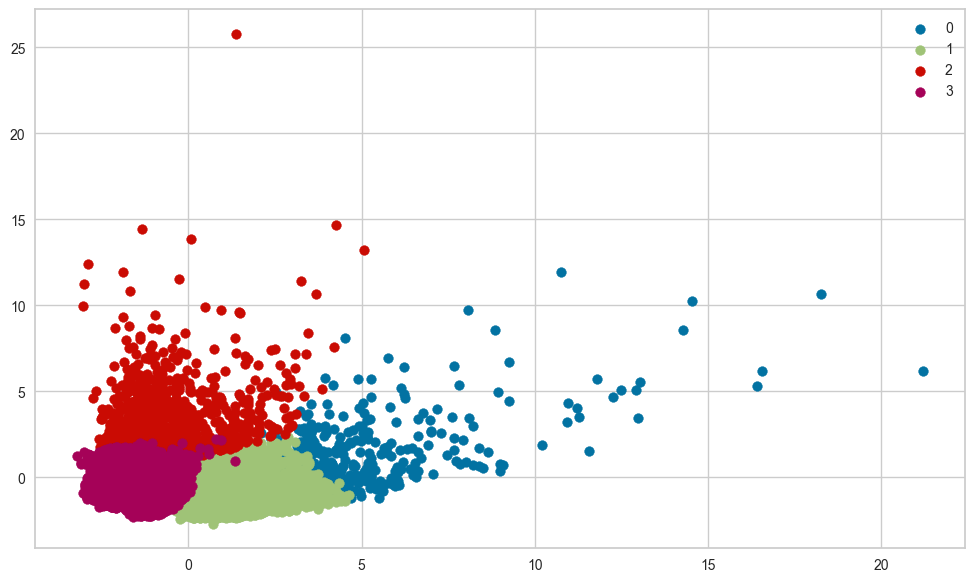

In [82]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
group = y_train
for g in np.unique(group):
    index = np.where(group==g)
    ax.scatter(pca_df.iloc[index].pca1, pca_df.iloc[index].pca2, label=g, cmap="cool")
ax.legend()
plt.show()

# SAVE AND LOAD

In [83]:
#Save model
import pickle #import thư viện pickle
file_name = "modelkmean.sav" #Tạo tên cũng như đường dẫn lưu model (nếu chỉ để tên model không thì sẽ lưu tại thư mục hiện hành)
pickle.dump(kmeans_model, open(file_name, "wb")) #nhận vào tên thư viện và đường dẫn lưu trữ model

In [85]:
#Load model
file_name = "modelkmean.sav"
model = pickle.load(open(file_name, "rb"))

In [93]:
y_prdict = KMeans.predict(X_test)
print ('Độ chính xác: ',KMeans.score(X_test,y_test))

TypeError: _BaseKMeans.predict() missing 1 required positional argument: 'X'